In [1]:
from sklearn.ensemble import IsolationForest
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from math import sqrt

%matplotlib inline

In [2]:
df = pd.read_csv(r'BLSvmDataO.csv', encoding='latin1',sep=';') #encoding='latin1'

C:\Anaconda\lib\site-packages\IPython\core\interactiveshell.py:3051: DtypeWarning: Columns (3,9,23,24,30) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


# Шаг 1. Предобработка данных

In [3]:
df.dtypes

SampleID          object
ObjectID           int64
Type_real          int64
CArea             object
CFFact           float64
CPolar           float64
NArea             object
NFFact           float64
NPolar           float64
NCCave            object
NCaveMaxPiece    float64
ODR              float64
ODG              float64
ODB              float64
NODR             float64
NODG             float64
NODB             float64
Nucls              int64
Segms              int64
Holes              int64
Tails              int64
PPM              float64
Nucleols           int64
NuclDensBrd       object
NuclZDens         object
NuclEuFraq       float64
NuclEuMeanDF     float64
NuclEuFFDist     float64
NuclEuFFChain    float64
Granuls            int64
GrArea            object
GrODR            float64
GrODG            float64
GrODB            float64
GrODH              int64
ODRCN            float64
ODGCN            float64
ODBCN            float64
C1               float64
C2               float64


Ищем пропущенные значения

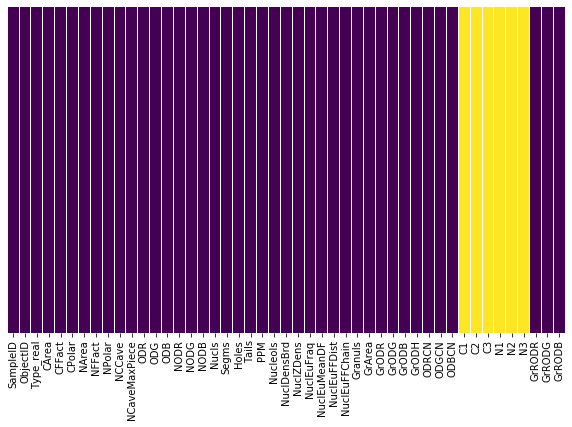

In [4]:
fig, ax = plt.subplots(figsize=(10,6))
sns_heatmap = sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='viridis')

In [5]:
#удаляем лишние столбцы
df1= df.drop(columns=["ObjectID","C1", "C2", "C3", "N1", "N2", "N3","SampleID"])

In [6]:
df1.isna().sum()

Type_real        0
CArea            0
CFFact           0
CPolar           0
NArea            0
NFFact           0
NPolar           0
NCCave           0
NCaveMaxPiece    0
ODR              0
ODG              0
ODB              0
NODR             0
NODG             0
NODB             0
Nucls            0
Segms            0
Holes            0
Tails            0
PPM              0
Nucleols         0
NuclDensBrd      0
NuclZDens        0
NuclEuFraq       0
NuclEuMeanDF     0
NuclEuFFDist     0
NuclEuFFChain    0
Granuls          0
GrArea           0
GrODR            0
GrODG            0
GrODB            0
GrODH            0
ODRCN            1
ODGCN            1
ODBCN            1
GrRODR           3
GrRODG           3
GrRODB           3
dtype: int64

Удаляем пропущенные значения

In [7]:
df1=df1.dropna()

Смотрим строки-дубликаты

In [8]:
print(df1.duplicated().sum())

4


In [9]:
df1[df1.duplicated(keep=False)]

,Type_real,CArea,CFFact,CPolar,NArea,NFFact,NPolar,NCCave,NCaveMaxPiece,ODR,...,GrODR,GrODG,GrODB,GrODH,ODRCN,ODGCN,ODBCN,GrRODR,GrRODG,GrRODB
1274,111,302.2240251681,36.481217,0.532789,134.1778578072,45.250091,0.800200,0.542215,0.831337,0.286841,...,0.286841,0.405156,0.081213,57,0.409796,0.262588,0.395699,1.000000,1.000000,1.000000
1276,111,302.2240251681,36.481217,0.532789,134.1778578072,45.250091,0.800200,0.542215,0.831337,0.286841,...,0.286841,0.405156,0.081213,57,0.409796,0.262588,0.395699,1.000000,1.000000,1.000000
2162,111,383.9507526722,43.669022,0.547266,226.644466505,66.503967,0.577706,0.793619,0.845227,0.198235,...,0.198235,0.435608,0.079450,71,0.308003,0.319003,0.421684,1.000000,1.000000,1.000000
2163,111,383.9507526722,43.669022,0.547266,226.644466505,66.503967,0.577706,0.793619,0.845227,0.198235,...,0.198235,0.435608,0.079450,71,0.308003,0.319003,0.421684,1.000000,1.000000,1.000000
2238,111,294.3810856122,30.814021,0.612674,183.8262559567,49.516336,0.723509,0.361051,0.888219,0.169192,...,0.169192,0.359142,0.062754,70,0.309344,0.295700,0.409775,1.000000,1.000000,1.000000
2241,111,294.3810856122,30.814021,0.612674,183.8262559567,49.516336,0.723509,0.361051,0.888219,0.169192,...,0.169192,0.359142,0.062754,70,0.309344,0.295700,0.409775,1.000000,1.000000,1.000000
72495,5,145.813,24.760034,0.214399,62.3666785104,46.842310,0.408095,0.420317,0.862534,0.263026,...,0.180219,0.617850,-0.009703,73,0.204139,0.163069,0.284104,1.459477,0.680548,-8.292635
72496,5,145.813,24.760034,0.214399,62.3666785104,46.842310,0.408095,0.420317,0.862534,0.263026,...,0.180219,0.617850,-0.009703,73,0.204139,0.163069,0.284104,1.459477,0.680548,-8.292635


Удаляем дупликаты

In [10]:
df1.drop_duplicates(inplace = True)
df1.reset_index(drop=True,inplace = True)

Смотрим уникальные значения

In [11]:
df1.nunique()

Type_real           28
CArea            32998
CFFact           84435
CPolar           85025
NArea            18270
NFFact           83811
NPolar           85025
NCCave           81060
NCaveMaxPiece    54486
ODR              85024
ODG              85025
ODB              85025
NODR             85024
NODG             85024
NODB             85025
Nucls               17
Segms               36
Holes                5
Tails               30
PPM                151
Nucleols             3
NuclDensBrd      77995
NuclZDens        75099
NuclEuFraq       66530
NuclEuMeanDF     60757
NuclEuFFDist     63053
NuclEuFFChain    84449
Granuls            131
GrArea            6072
GrODR            84902
GrODG            84872
GrODB            84883
GrODH              176
ODRCN            85025
ODGCN            85025
ODBCN            85025
GrRODR           84951
GrRODG           84967
GrRODB           84838
dtype: int64

Смотрим на типы данных в колонках

In [12]:
df1.dtypes

Type_real          int64
CArea             object
CFFact           float64
CPolar           float64
NArea             object
NFFact           float64
NPolar           float64
NCCave            object
NCaveMaxPiece    float64
ODR              float64
ODG              float64
ODB              float64
NODR             float64
NODG             float64
NODB             float64
Nucls              int64
Segms              int64
Holes              int64
Tails              int64
PPM              float64
Nucleols           int64
NuclDensBrd       object
NuclZDens         object
NuclEuFraq       float64
NuclEuMeanDF     float64
NuclEuFFDist     float64
NuclEuFFChain    float64
Granuls            int64
GrArea            object
GrODR            float64
GrODG            float64
GrODB            float64
GrODH              int64
ODRCN            float64
ODGCN            float64
ODBCN            float64
GrRODR           float64
GrRODG           float64
GrRODB           float64
dtype: object

числовые данные - желтые

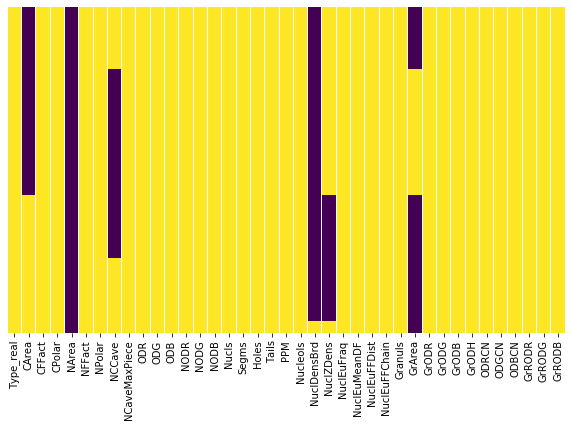

In [13]:
fig, ax = plt.subplots(figsize=(10,6))
sns_heatmap = sns.heatmap(df1.applymap(np.isreal), yticklabels=False, cbar=False, cmap='viridis')

Конвертируем все колонки в float()

In [14]:
df2=df1.select_dtypes(exclude=[np.number])

In [15]:
strange_rows=[]
for i in range(0, len(df2)):
    for element in df2.columns:
        try:
            b=float(df2.loc[i, element])
        except:
            if i in strange_rows:
                break
            else:
                strange_rows.append(i)

In [16]:
df2.loc[strange_rows]

,CArea,NArea,NCCave,NuclDensBrd,NuclZDens,GrArea
18,105.73,60.44,0.0233289,1.3564155102,1.23625,02.¬ ©
35,182.69,97.7,0.110645,1.3507261276,1.37771,ä¥¢.75
57,122.09,48.92,0.383483,1.3618090153,1.05193,01.¬ ©
99,267.57,60.64,0.480211,1.7316482067,1.2221,12.¬ ©
109,99.22,27.¬ ©,0.0298182,1.7706334591,1.41315,0.5600000024
...,...,...,...,...,...,...
84723,90.79,27.¬ ©,0.032,1.09173,0.72623,0
84847,187.02,54.65,0.626167,1.10011,0.776953,05.¬ ©
84859,152.44,85.32,0.0336381,0.799722,0.809458,02.¬ ©
84925,169.68,84.95,0.0423779,0.829306,0.837123,01.¬ ©


Удаляем странные значения

In [17]:
df1.drop(index=strange_rows,inplace=True)

Конвертируем все данные во float

In [18]:
for element in df1.columns[1:]:
    df1[element]=df1[element].astype('float')

Проверяем типы переменных

In [19]:
df1.dtypes

Type_real          int64
CArea            float64
CFFact           float64
CPolar           float64
NArea            float64
NFFact           float64
NPolar           float64
NCCave           float64
NCaveMaxPiece    float64
ODR              float64
ODG              float64
ODB              float64
NODR             float64
NODG             float64
NODB             float64
Nucls            float64
Segms            float64
Holes            float64
Tails            float64
PPM              float64
Nucleols         float64
NuclDensBrd      float64
NuclZDens        float64
NuclEuFraq       float64
NuclEuMeanDF     float64
NuclEuFFDist     float64
NuclEuFFChain    float64
Granuls          float64
GrArea           float64
GrODR            float64
GrODG            float64
GrODB            float64
GrODH            float64
ODRCN            float64
ODGCN            float64
ODBCN            float64
GrRODR           float64
GrRODG           float64
GrRODB           float64
dtype: object

# Шаг 2. Поиск выбросов

Создаем объясняемую переменную

In [20]:
classes={1:'моноциты',2:'бласты',3:'лимфоциты'}

In [21]:
df1=df1[df1['Type_real'].isin([9,12,13,8,28,29])]
df1['Type_real'].replace(9,1,inplace=True)
df1['Type_real'].replace([12,13],2,inplace=True)
df1['Type_real'].replace([8,28,29],3,inplace=True)

Строим гистрограммы и смотрим выбросы

In [22]:
df1['Type_real'].unique()

array([3, 1, 2], dtype=int64)

C:\Anaconda\lib\site-packages\ipykernel_launcher.py:5: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  """


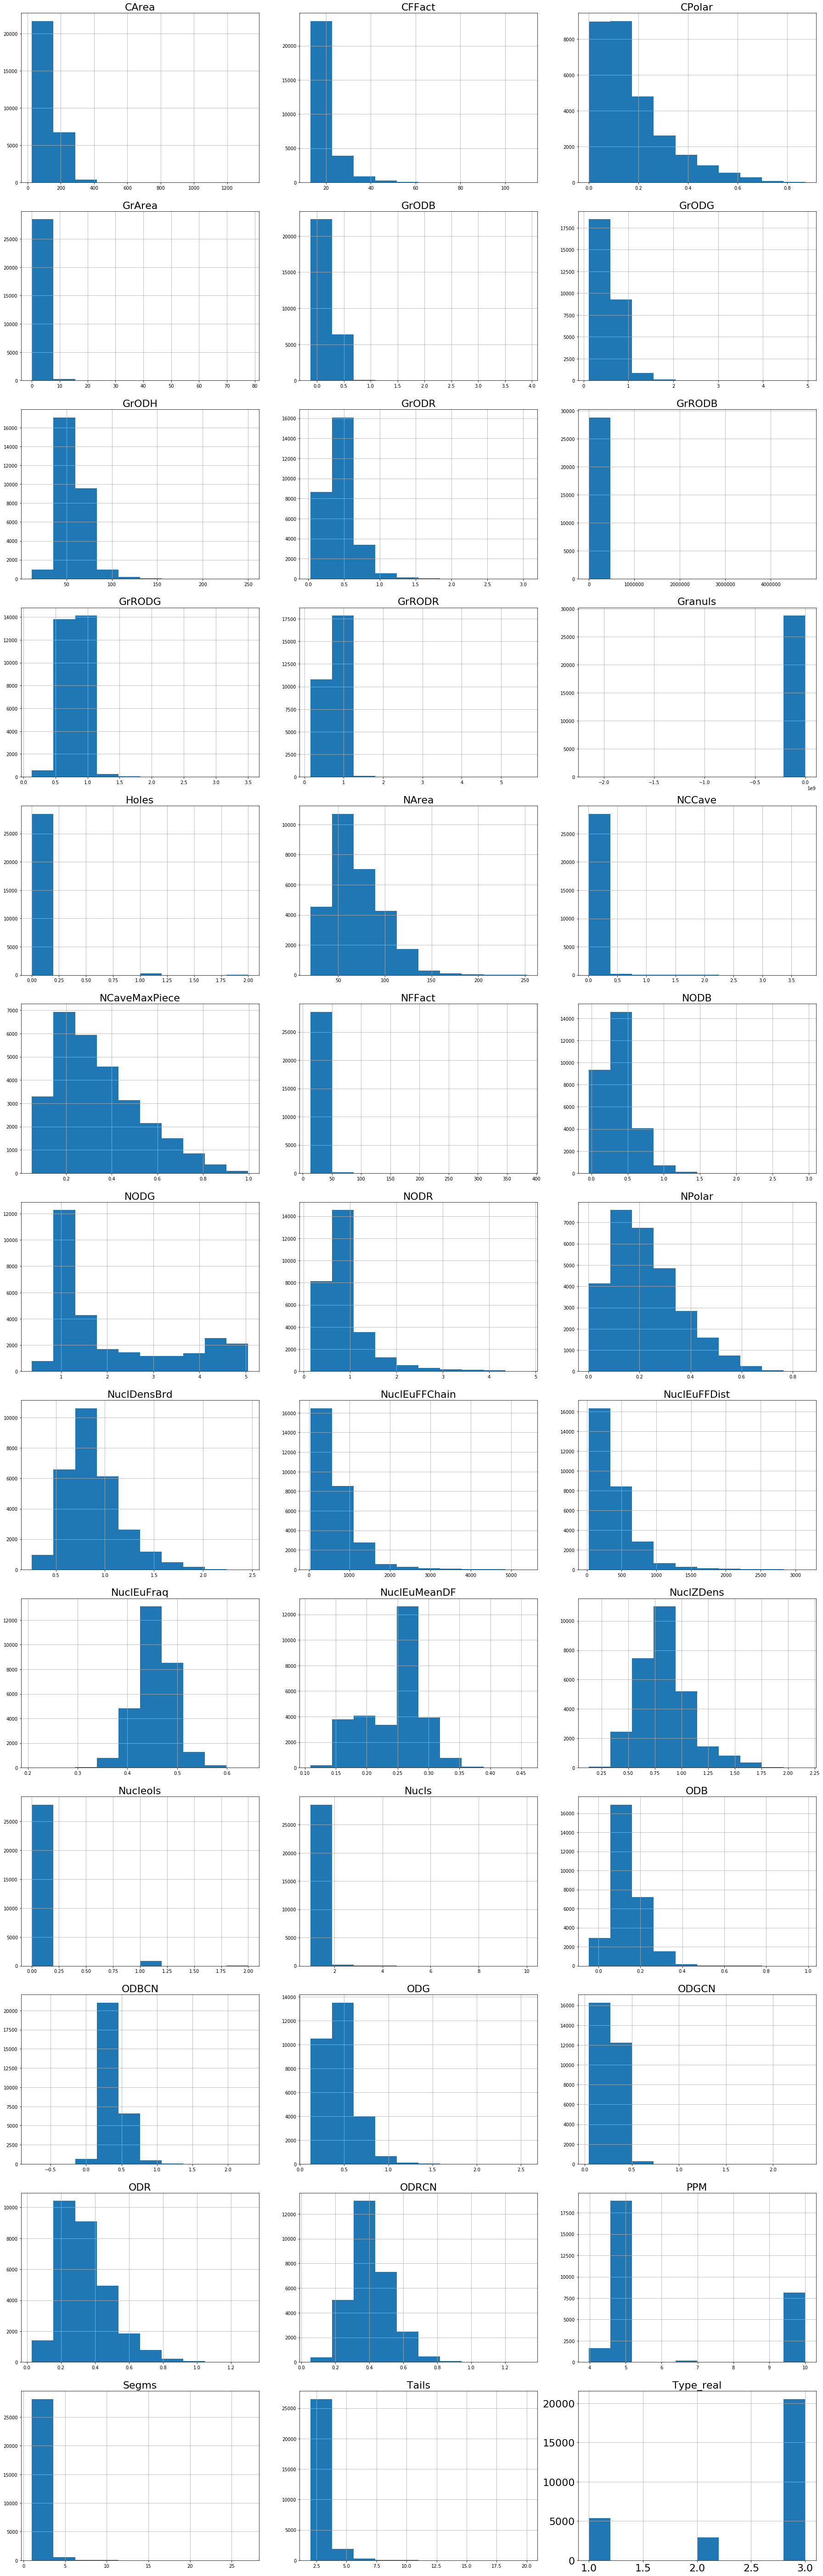

In [23]:
N=df1.shape[1]
plt.rcParams['axes.labelsize'] = 22
plt.rcParams['axes.titlesize'] = 22
fig, ax = plt.subplots(figsize=(25,N*2))
df1.iloc[:,:N].hist(ax=ax, layout=(int(N/3),3))
plt.tick_params(axis='both', which='major', labelsize=22)
plt.tick_params(axis='both', which='major', labelsize=22)
ax.tick_params(axis='x', length=5, direction='out')
fig.tight_layout()
plt.show()

Выведим  выбросы с помощью изоляционного леса

In [24]:
model=IsolationForest(n_estimators=50, max_samples='auto', contamination=float(0.01),max_features=1.0)
outliers_index=[]
for y in df1['Type_real'].unique():
    print(y)
    df_out=df1.loc[df1['Type_real']==y].copy()
    for column_name in df1.columns[1:]:
        model.fit(df_out[[column_name]])
        df_out.loc[:,'anomaly']=model.predict(df_out[[column_name]])
        outliers_index=outliers_index+df_out.loc[df_out['anomaly']==-1].index.tolist()
x = np.array(outliers_index) 

3


C:\Anaconda\lib\site-packages\sklearn\ensemble\iforest.py:247: FutureWarning: behaviour="old" is deprecated and will be removed in version 0.22. Please use behaviour="new", which makes the decision_function change to match other anomaly detection algorithm API.
  FutureWarning)
C:\Anaconda\lib\site-packages\sklearn\ensemble\iforest.py:415: DeprecationWarning: threshold_ attribute is deprecated in 0.20 and will be removed in 0.22.
  " be removed in 0.22.", DeprecationWarning)
C:\Anaconda\lib\site-packages\sklearn\ensemble\iforest.py:247: FutureWarning: behaviour="old" is deprecated and will be removed in version 0.22. Please use behaviour="new", which makes the decision_function change to match other anomaly detection algorithm API.
  FutureWarning)
C:\Anaconda\lib\site-packages\sklearn\ensemble\iforest.py:415: DeprecationWarning: threshold_ attribute is deprecated in 0.20 and will be removed in 0.22.
  " be removed in 0.22.", DeprecationWarning)
C:\Anaconda\lib\site-packages\sklearn\en

1


C:\Anaconda\lib\site-packages\sklearn\ensemble\iforest.py:247: FutureWarning: behaviour="old" is deprecated and will be removed in version 0.22. Please use behaviour="new", which makes the decision_function change to match other anomaly detection algorithm API.
  FutureWarning)
C:\Anaconda\lib\site-packages\sklearn\ensemble\iforest.py:415: DeprecationWarning: threshold_ attribute is deprecated in 0.20 and will be removed in 0.22.
  " be removed in 0.22.", DeprecationWarning)
C:\Anaconda\lib\site-packages\sklearn\ensemble\iforest.py:247: FutureWarning: behaviour="old" is deprecated and will be removed in version 0.22. Please use behaviour="new", which makes the decision_function change to match other anomaly detection algorithm API.
  FutureWarning)
C:\Anaconda\lib\site-packages\sklearn\ensemble\iforest.py:415: DeprecationWarning: threshold_ attribute is deprecated in 0.20 and will be removed in 0.22.
  " be removed in 0.22.", DeprecationWarning)
C:\Anaconda\lib\site-packages\sklearn\en

2


C:\Anaconda\lib\site-packages\sklearn\ensemble\iforest.py:247: FutureWarning: behaviour="old" is deprecated and will be removed in version 0.22. Please use behaviour="new", which makes the decision_function change to match other anomaly detection algorithm API.
  FutureWarning)
C:\Anaconda\lib\site-packages\sklearn\ensemble\iforest.py:415: DeprecationWarning: threshold_ attribute is deprecated in 0.20 and will be removed in 0.22.
  " be removed in 0.22.", DeprecationWarning)
C:\Anaconda\lib\site-packages\sklearn\ensemble\iforest.py:247: FutureWarning: behaviour="old" is deprecated and will be removed in version 0.22. Please use behaviour="new", which makes the decision_function change to match other anomaly detection algorithm API.
  FutureWarning)
C:\Anaconda\lib\site-packages\sklearn\ensemble\iforest.py:415: DeprecationWarning: threshold_ attribute is deprecated in 0.20 and will be removed in 0.22.
  " be removed in 0.22.", DeprecationWarning)
C:\Anaconda\lib\site-packages\sklearn\en

In [25]:
len(np.unique(x))

5309

In [26]:
df1['Type_real'].unique()

array([3, 1, 2], dtype=int64)

In [27]:
df1.drop(index=x)['Type_real'].unique()

array([3, 1, 2], dtype=int64)

Удаляем выбросы и смотрим на новые гистограммы распределений

C:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  


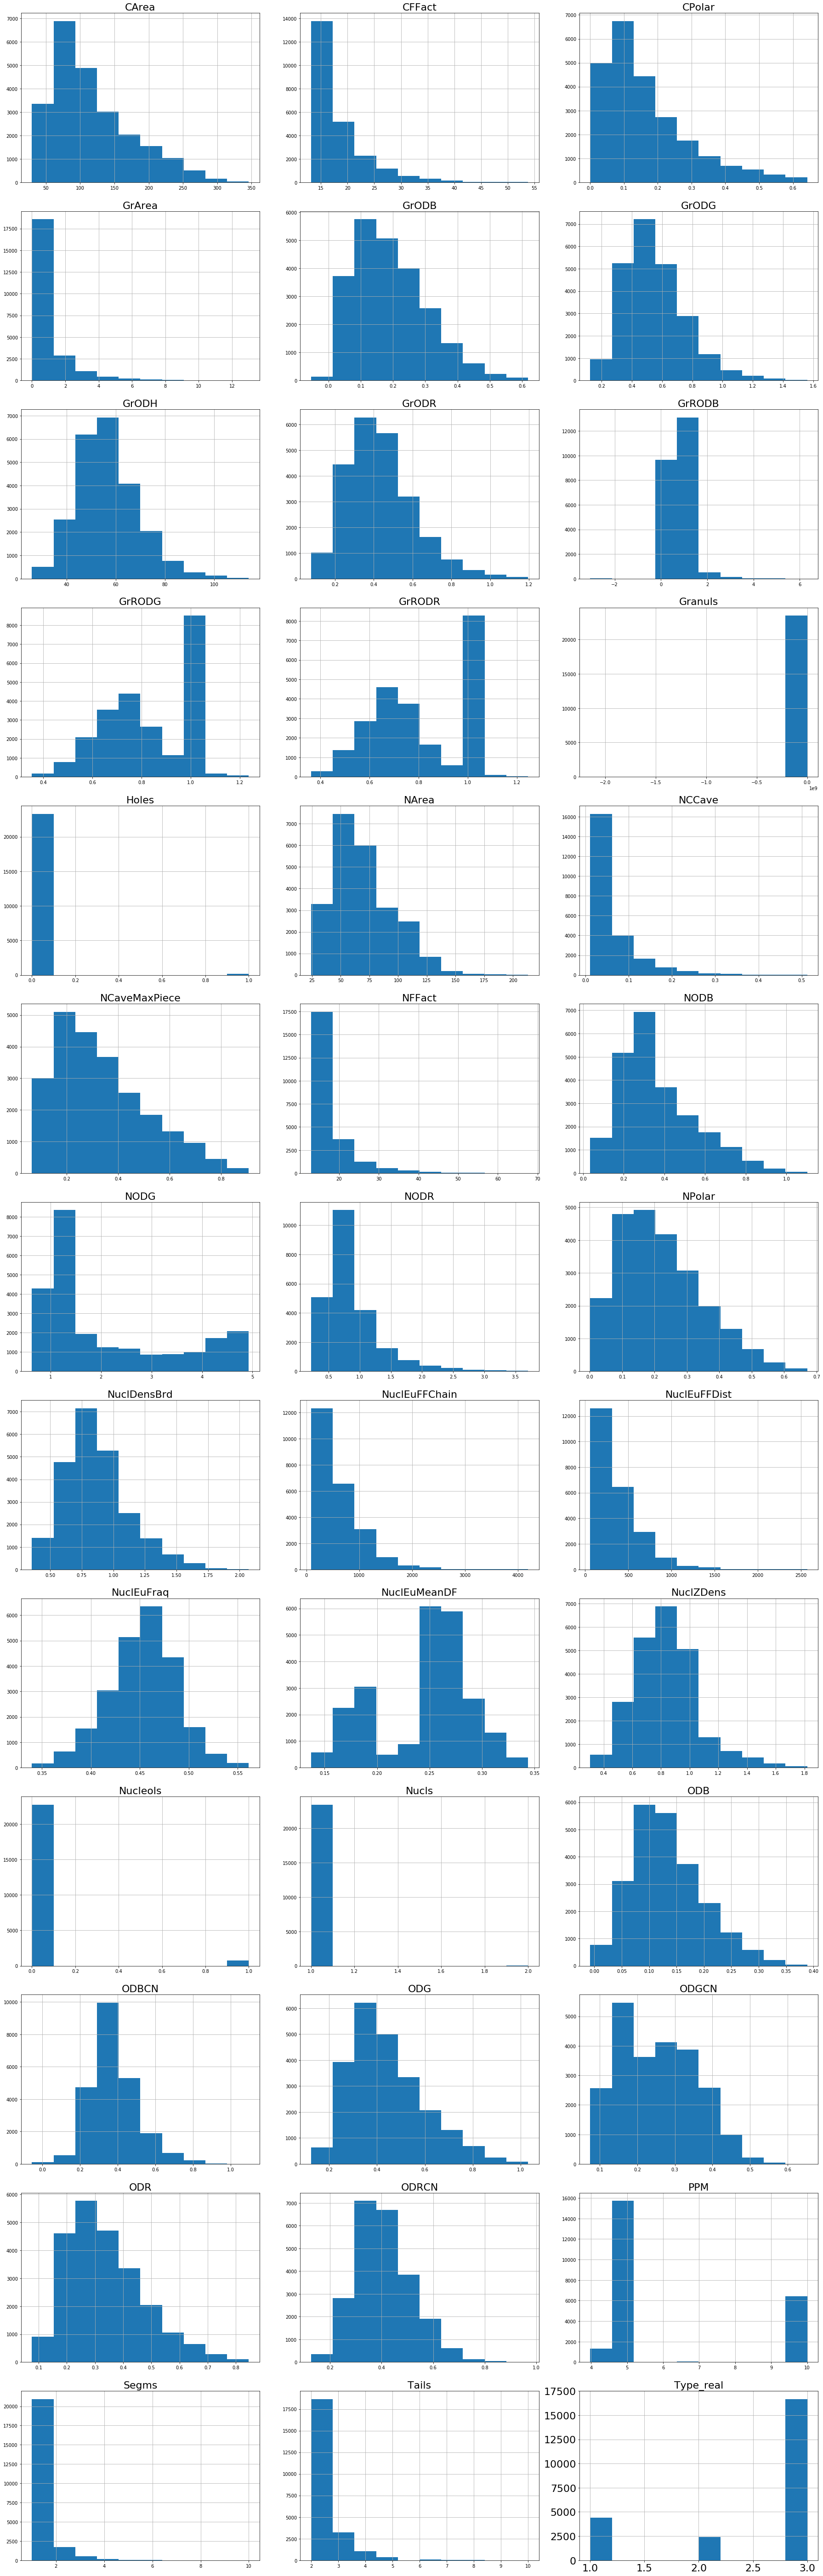

In [28]:
df2=df1.drop(index=x)
N=df2.shape[1]
plt.rcParams['axes.labelsize'] = 22
plt.rcParams['axes.titlesize'] = 22
fig, ax = plt.subplots(figsize=(25,N*2))
df2.iloc[:,:N].hist(ax=ax, layout=(int(N/3),3))
plt.tick_params(axis='both', which='major', labelsize=22)
plt.tick_params(axis='both', which='major', labelsize=22)
ax.tick_params(axis='x', length=5, direction='out')
fig.tight_layout()
plt.show()

In [31]:
df2.nunique()

Type_real            3
CArea            11056
CFFact           23353
CPolar           23510
NArea             7967
NFFact           22833
NPolar           23510
NCCave           21229
NCaveMaxPiece    10364
ODR              23510
ODG              23510
ODB              23510
NODR             23509
NODG             23510
NODB             23510
Nucls                2
Segms               10
Holes                2
Tails                9
PPM                107
Nucleols             2
NuclDensBrd      22798
NuclZDens        22640
NuclEuFraq       21467
NuclEuMeanDF     20646
NuclEuFFDist     21344
NuclEuFFChain    23474
Granuls             54
GrArea            1675
GrODR            23497
GrODG            23497
GrODB            23495
GrODH               88
ODRCN            23510
ODGCN            23510
ODBCN            23510
GrRODR           23488
GrRODG           23500
GrRODB           23465
dtype: int64

# Шаг 3. Построение модели

Шкалирование данных

In [29]:
df2

,Type_real,CArea,CFFact,CPolar,NArea,NFFact,NPolar,NCCave,NCaveMaxPiece,ODR,...,GrODR,GrODG,GrODB,GrODH,ODRCN,ODGCN,ODBCN,GrRODR,GrRODG,GrRODB
4,3,83.93,14.550742,0.144894,57.77,17.414287,0.060139,0.044487,0.167315,0.455981,...,0.666791,0.678645,0.315946,44.0,0.669039,0.413368,0.525311,0.683844,0.758749,0.747957
6,1,171.95,21.500572,0.149194,95.81,31.218176,0.279502,0.117002,0.220339,0.235026,...,0.353409,0.516725,0.277532,72.0,0.518693,0.358223,0.438260,0.665027,0.713566,0.613570
11,3,74.67,15.713081,0.063055,70.30,15.882751,0.068971,0.040825,0.212544,0.194184,...,0.194184,0.257400,0.139380,65.0,0.279931,0.218177,0.317217,1.000000,1.000000,1.000000
13,3,101.16,16.806894,0.059025,62.32,14.399597,0.025037,0.028883,0.111111,0.254218,...,0.412466,0.490809,0.291633,59.0,0.472650,0.284054,0.397844,0.616336,0.688867,0.581991
25,3,107.01,15.933274,0.097108,66.60,14.929015,0.159260,0.024625,0.121951,0.250583,...,0.349085,0.442180,0.249675,63.0,0.501794,0.281255,0.356029,0.717829,0.743569,0.608958
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85016,3,103.24,16.578104,0.187489,70.57,18.027194,0.427220,0.050446,0.446629,0.349505,...,0.385662,0.567869,0.155642,61.0,0.386712,0.304353,0.442931,0.906248,1.004931,1.130383
85018,3,93.23,17.855822,0.067238,67.15,21.140831,0.087584,0.089054,0.359532,0.366467,...,0.497485,0.787050,0.199051,63.0,0.413320,0.353104,0.539274,0.736639,0.802407,1.058907
85019,3,107.95,15.803540,0.112601,75.67,17.388229,0.204987,0.040174,0.187500,0.372005,...,0.488561,0.880104,0.213667,68.0,0.449574,0.369643,0.499409,0.761431,0.713831,0.862120
85020,3,91.94,15.191297,0.166613,73.48,17.295434,0.122506,0.052123,0.297650,0.451020,...,0.451020,0.633740,0.177421,59.0,0.494637,0.348795,0.473342,1.000000,1.000000,1.000000


In [30]:
from sklearn import preprocessing
X_scaled = preprocessing.scale(df2.drop(columns=['Type_real']))

In [31]:
df3=pd.DataFrame(X_scaled,columns=df2.drop(columns=['Type_real']).columns,index=df2.index)
df3['Type_real']=df2['Type_real']

In [32]:
df3

,CArea,CFFact,CPolar,NArea,NFFact,NPolar,NCCave,NCaveMaxPiece,ODR,ODG,...,GrODG,GrODB,GrODH,ODRCN,ODGCN,ODBCN,GrRODR,GrRODG,GrRODB,Type_real
4,-0.572025,-0.722097,-0.161994,-0.458725,-0.063249,-1.254402,-0.324595,-0.963473,0.872952,0.470222,...,0.628215,1.109430,-1.019655,2.380253,1.582247,1.169812,-0.645547,-0.391669,-0.167410,3
6,0.941724,0.609177,-0.127868,0.998087,2.447280,0.470709,0.936882,-0.662244,-0.758012,-0.468057,...,-0.168536,0.765071,1.231695,1.006936,1.033936,0.477944,-0.751397,-0.662088,-0.482173,1
11,-0.731277,-0.499446,-0.811449,0.021135,-0.341791,-1.184944,-0.388294,-0.706530,-1.059488,-1.182454,...,-1.444585,-0.473410,0.668858,-1.174014,-0.358563,-0.484100,1.132870,1.052239,0.422932,3
13,-0.275707,-0.289921,-0.843426,-0.284474,-0.611534,-1.530447,-0.596033,-1.282768,-0.616354,-0.664534,...,-0.296057,0.891480,0.186425,0.586363,0.296466,0.156718,-1.025291,-0.809916,-0.556140,3
25,-0.175100,-0.457267,-0.541211,-0.120564,-0.515248,-0.474896,-0.670115,-1.221186,-0.643180,-0.724288,...,-0.535345,0.515345,0.508047,0.852574,0.268635,-0.175623,-0.454377,-0.482520,-0.492977,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85016,-0.239936,-0.333746,0.176032,0.031475,0.048221,1.632393,-0.220922,0.623312,0.087007,0.827994,...,0.083126,-0.327623,0.347236,-0.198636,0.498298,0.515064,0.605502,1.081751,0.728319,3
85018,-0.412086,-0.088993,-0.778250,-0.099500,0.614502,-1.038571,0.450700,0.128511,0.212211,1.218608,...,1.161640,0.061522,0.508047,0.044419,0.983036,1.280797,-0.348570,-0.130368,0.560906,3
85019,-0.158934,-0.482118,-0.418261,0.226789,-0.067988,-0.115284,-0.399611,-0.848803,0.253087,1.197494,...,1.619523,0.192546,0.910074,0.375575,1.147484,0.963950,-0.209114,-0.660506,0.099986,3
85020,-0.434271,-0.599396,0.010364,0.142919,-0.084865,-0.763931,-0.191755,-0.223039,0.836331,1.232759,...,0.407254,-0.132383,0.186425,0.787193,0.940188,0.756767,1.132870,1.052239,0.422932,3


Разобиваем на три выборки

In [40]:
X_train, X_test, y_train, y_test = train_test_split(df3.drop(columns=['Type_real']),df3['Type_real'], test_size=0.4,stratify=df3['Type_real'])

In [41]:
X_test['Type_real']=y_test
df4=X_test
X_test, X_valid, y_test, y_valid = train_test_split(df4.drop(columns=['Type_real']),df4['Type_real'], test_size=0.5,stratify=df4['Type_real'])

Подбираем поиском по сетке лучшие гиперпараметры

In [38]:
from sklearn import svm

In [42]:
parameters = [{'kernel': ['rbf'], 'gamma': [1e-3, 1e-4],
                     'C': [1, 10, 100, 1000]},
                    {'kernel': ['linear'], 'C': [1, 10, 100, 1000]}]
gs = GridSearchCV(svm.SVC(),parameters,verbose=1, cv=3,n_jobs=-1,scoring='accuracy')
gs_results=gs.fit(X_valid,y_valid)

Fitting 3 folds for each of 12 candidates, totalling 36 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  36 out of  36 | elapsed:  5.5min finished


In [43]:
gs_results.best_params_

{'C': 1000, 'gamma': 0.001, 'kernel': 'rbf'}

Финальная точность

In [44]:
clf2 = svm.SVC(C=1000, gamma=0.001, kernel='rbf')
clf2.fit(X_train,y_train) 
scores=cross_val_score(clf2, X_test, y_test,scoring='accuracy')
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

C:\Anaconda\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


Accuracy: 0.95 (+/- 0.01)


In [45]:
from sklearn.metrics import classification_report
from sklearn.metrics import precision_recall_fscore_support
from sklearn.utils.multiclass import unique_labels

In [46]:
target_names = target_names = list(classes.values())
print(classification_report(y_test, clf2.predict(X_test),target_names=target_names))


              precision    recall  f1-score   support

    моноциты       0.94      0.94      0.94       885
      бласты       0.93      0.83      0.88       482
   лимфоциты       0.97      0.98      0.98      3333

    accuracy                           0.96      4700
   macro avg       0.94      0.92      0.93      4700
weighted avg       0.96      0.96      0.96      4700



In [52]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test, clf2.predict(X_test))
print(cm)

[[ 829   10   46]
 [  17  401   64]
 [  35   22 3276]]


In [57]:
import matplotlib.pyplot as plt
import numpy as np
import itertools

In [ ]:
classification_plots.confusion_matrix(y_test, y_pred,
cmap="Blues",
xticklabels=labels,
yticklabels=labels)

In [61]:
def plot_confusion_matrix(cm,
                          target_names,
                          title='Confusion matrix',
                          cmap=None,
                          normalize=True):
    import matplotlib.pyplot as plt
    import numpy as np
    import itertools

    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('Blues')

    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")


    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    plt.show()

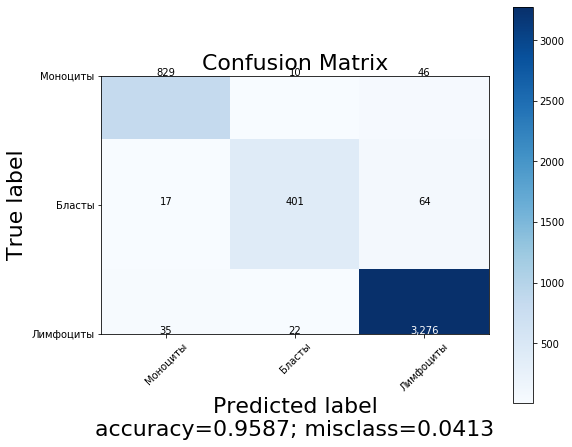

In [65]:
plot_confusion_matrix(cm           = np.array(cm), 
                      normalize    = False,
                      target_names = ['Моноциты', 'Бласты', 'Лимфоциты'],
                      title        = "Confusion Matrix")

In [55]:
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
print('Normalized confusion matrix')
print(cm_normalized)

Normalized confusion matrix
[[0.93672316 0.01129944 0.0519774 ]
 [0.03526971 0.83195021 0.13278008]
 [0.01050105 0.00660066 0.98289829]]


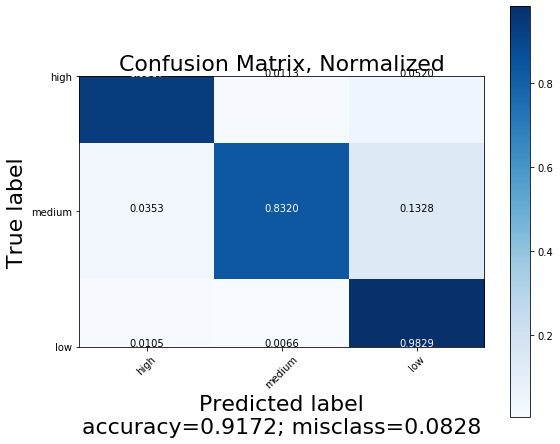

In [63]:
plot_confusion_matrix(cm           = np.array(cm_normalized), 
                      normalize    = True,
                      target_names = ['high', 'medium', 'low'],
                      title        = "Confusion Matrix, Normalized")

In [68]:
lr = LogisticRegression()
y_pred_proba = lr.predict_proba(clf2.predict(X_test))[:,1]
fpr, tpr, threshold = roc_curve(y_test, y_pred_proba)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

NameError: name 'LogisticRegression' is not defined

In [66]:
clf2 = svm.SVC(C=1000, gamma=0.001, kernel='linear')
clf2.fit(X_train,y_train) 
clf2.coef_

KeyboardInterrupt: 

In [ ]:
clf2.classes_

In [ ]:
Какие переменные лучше всего предсказывают

In [ ]:
def f_importances(coef, names,label):
    imp = coef
    imp,names = zip(*sorted(zip(imp,names)))
    plt.figure(figsize=(7,11))
    plt.tick_params(axis='both', which='major', labelsize=14)
    plt.barh(range(len(names)), imp, align='center')
    plt.yticks(range(len(names)), names)
    plt.title(label)
    plt.show()

f_importances(clf2.coef_[0], X_train.columns,classes[1])
f_importances(clf2.coef_[1], X_train.columns,classes[2])
f_importances(clf2.coef_[2], X_train.columns,classes[3])